In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import VerticalPitch
import matplotlib.patches as patches
from matplotlib.patheffects import Stroke, Normal, withStroke

In [2]:
file_path = r'C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\Aplicacion Final\2024\Mapas de tiro AL 2024\MapaTiros_2024.xlsx'

#all_sheets = pd.read_excel(file_path, sheet_name=None)
df_resumen_partidos = pd.read_excel(file_path, sheet_name='A01')

# Concatenar todas las hojas en un solo DataFrame
#df_resumen_partidos = pd.concat(all_sheets.values(), ignore_index=True)

# Mostrar el DataFrame resultante
print(df_resumen_partidos)

    isHome shotType   situation    bodyPart goalMouthLocation  \
0     True     miss  fast-break  right-foot              left   
1     True     post    assisted  right-foot              high   
2    False     post    assisted  right-foot              high   
3     True     save     regular   left-foot        low-centre   
4     True     miss  fast-break   left-foot             right   
5     True    block      corner  right-foot        low-centre   
6     True     miss      corner        head              high   
7     True     goal    assisted  right-foot        high-right   
8     True     miss     regular  right-foot         high-left   
9     True     goal    assisted        head          low-left   
10    True     miss    assisted   left-foot              left   
11    True     save   set-piece  right-foot         low-right   
12    True     save   set-piece  right-foot         low-right   
13   False     miss    assisted  right-foot             right   
14    True     miss    as

In [3]:
def apply_color_based_on_shot_type(shot_type):
    if shot_type == 'block':
        return 'coral'
    elif shot_type == 'miss':
        return 'darkred'
    elif shot_type == 'goal':
        return 'darkgreen'
    elif shot_type in ['save', 'post']:
        return 'darkgoldenrod'
    else:
        return 'gray'

In [4]:
df_resumen_partidos['color'] = df_resumen_partidos['shotType'].apply(apply_color_based_on_shot_type)

### Valores unicos

In [3]:
df_resumen_partidos.columns

Index(['isHome', 'shotType', 'goalType', 'situation', 'bodyPart',
       'goalMouthLocation', 'goalMouthCoordinates', 'id', 'time', 'addedTime',
       'timeSeconds', 'draw', 'reversedPeriodTime',
       'reversedPeriodTimeSeconds', 'incidentType', 'blockCoordinates', 'name',
       'firstName', 'lastName', 'slug', 'shortName', 'position',
       'jerseyNumber', 'userCount', 'id.1', 'x', 'y', 'z'],
      dtype='object')

In [6]:
valores_unicos_shotType = df_resumen_partidos['shotType'].unique()

# Mostrar los valores únicos de 'shotType'
print(valores_unicos_shotType)

['miss' 'post' 'save' 'block' 'goal']


In [74]:
valores_unicos_situation = df_resumen_partidos['situation'].unique()

# Mostrar los valores únicos de 'situation'
print(valores_unicos_situation)

['fast-break' 'assisted' 'regular' 'corner' 'set-piece' 'penalty'
 'free-kick' 'throw-in-set-piece']


In [73]:
valores_unicos_bodyPart = df_resumen_partidos['goalMouthLocation'].unique()

# Mostrar los valores únicos de 'bodyPart'
print(valores_unicos_bodyPart)

['left' 'high' 'low-centre' 'right' 'high-right' 'high-left' 'low-left'
 'low-right' 'close-high-right' 'high-centre' 'close-right' 'close-left'
 'close-high' 'close-high-left']


### Tiros a puerta y fuera

In [5]:
shots_on_target = ['save', 'goal']
shots_off_target = ['miss', 'post', 'block']

# Filtrar y crear el DataFrame df_shots_on_target
df_shots_on_target = df_resumen_partidos[df_resumen_partidos['shotType'].isin(shots_on_target)]

# Filtrar y crear el DataFrame df_shots_off_target
df_shots_off_target = df_resumen_partidos[df_resumen_partidos['shotType'].isin(shots_off_target)]

print("Cantidad de filas en df_shots_on_target:", df_shots_on_target.shape[0])
print("Cantidad de filas en df_shots_off_target:", df_shots_off_target.shape[0])

Cantidad de filas en df_shots_on_target: 9
Cantidad de filas en df_shots_off_target: 15


In [75]:
df_shots_on_target['goalMouthLocation'].unique()

array(['low-centre', 'high-right', 'low-left', 'low-right', 'high-centre',
       'high-left'], dtype=object)

In [14]:
situations_balon_parado = ['corner', 'set-piece' ,'throw-in', 'free-kick', 'throw-in-set-piece']
situations_jugadas = ['assisted','fast-break','regular']
situations_penales = ['penalty']

In [17]:
df_shots_on_target_AL = df_shots_on_target[df_shots_on_target['isHome']==True]
df_shots_off_target_AL = df_shots_off_target[df_shots_off_target['isHome']==True]

# Tiros a puerta AL

### Situaciones de gol

In [15]:
df_tiros_ot_balon_parado_AL = df_shots_on_target_AL[df_shots_on_target_AL['situation'].isin(situations_balon_parado)]
df_tiros_ot_jugadas_AL = df_shots_on_target_AL[df_shots_on_target_AL['situation'].isin(situations_jugadas)]
df_tiros_ot_penales_AL = df_shots_on_target_AL[df_shots_on_target_AL['situation'].isin(situations_penales)]


print("Cantidad de tiros a puerta tras balon_parado:", df_tiros_ot_balon_parado_AL.shape[0])
print("Cantidad de tiros a puerta tras jugada:", df_tiros_ot_jugadas_AL.shape[0])
if df_tiros_ot_penales_AL.shape[0] > 0:
    print("Cantidad de tiros a puerta por penal:", df_tiros_ot_penales_AL.shape[0])

Cantidad de tiros a puerta tras balon_parado: 32
Cantidad de tiros a puerta tras jugada: 74
Cantidad de tiros a puerta por penal: 4


In [16]:
df_tiros_off_balon_parado_AL = df_shots_off_target_AL[df_shots_off_target_AL['situation'].isin(situations_balon_parado)]
df_tiros_off_jugadas_AL = df_shots_off_target_AL[df_shots_off_target_AL['situation'].isin(situations_jugadas)]
df_tiros_off_penales_AL = df_shots_off_target_AL[df_shots_off_target_AL['situation'].isin(situations_penales)]


print("Cantidad de tiros fuera tras balon_parado:", df_tiros_off_balon_parado_AL.shape[0])
print("Cantidad de tiros fuera tras jugada:", df_tiros_off_jugadas_AL.shape[0])
if df_tiros_off_penales_AL.shape[0] > 0:
    print("Cantidad de tiros fuera tras penal:", df_tiros_off_penales_AL.shape[0])

Cantidad de tiros fuera tras balon_parado: 81
Cantidad de tiros fuera tras jugada: 131


## Graficos de tiros a puerta

In [8]:
df_shots_on_target_AL.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'goalMouthCoordinates', 'id', 'time', 'timeSeconds', 'draw',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'incidentType',
       'blockCoordinates', 'goalType', 'name', 'firstName', 'lastName', 'slug',
       'shortName', 'position', 'jerseyNumber', 'userCount', 'id.1', 'x', 'y',
       'z', 'color'],
      dtype='object')

In [9]:
df_coordenadas = df_shots_on_target_AL['goalMouthCoordinates'].reset_index(drop=True)
dict_list = [eval(coord) for coord in df_coordenadas.tolist()]
df_goalzone_AL = pd.DataFrame(dict_list)
df_goalzone_AL['shotType'] = df_shots_on_target_AL['shotType'].values
df_goalzone_AL['situation'] = df_shots_on_target_AL['situation'].values
df_goalzone_AL['jerseyNumber'] = df_shots_on_target_AL['jerseyNumber'].values
df_goalzone_AL['bodyPart'] = df_shots_on_target_AL['bodyPart'].values
df_goalzone_AL['goalMouthLocation'] = df_shots_on_target_AL['goalMouthLocation'].values
df_goalzone_AL['time'] = df_shots_on_target_AL['time'].values
df_goalzone_AL['shortName'] = df_shots_on_target_AL['shortName'].values
df_goalzone_AL['position'] = df_shots_on_target_AL['position'].values
df_goalzone_AL['color'] = df_shots_on_target_AL['color'].values
if 'goalType' in df_shots_on_target_AL.columns:
    df_goalzone_AL['goalType'] = df_shots_on_target_AL['goalType'].values

In [11]:
import plotly.express as px

# Crear el gráfico con Plotly y asignar colores específicos
fig = px.scatter(df_goalzone_AL, x='y', y='z', title='Tiros al arco Alianza Lima', 
                 labels={'y': 'y', 'z': 'z'}, color='color', 
                 color_discrete_map={'darkgreen': 'darkgreen', 
                                     'darkgoldenrod': 'darkgoldenrod',
                                     'coral': 'coral',
                                     'darkred': 'darkred'},
                 hover_data={'shortName': True, 'shotType': True, 
                             'bodyPart': True, 'goalMouthLocation': True, 
                             'time': True, 'y': False, 'z': False, 'color': False,
                             'situation':True})

# Invertir el eje horizontal (y)
fig.update_xaxes(autorange="reversed")

# Añadir barras
fig.add_shape(type="line",
              x0=45.4, y0=0, x1=45.4, y1=35.5,
              line=dict(color="Black", width=5))

fig.add_shape(type="line",
              x0=54.5, y0=0, x1=54.5, y1=35.5,
              line=dict(color="Black", width=5))

fig.add_shape(type="line",
              x0=45.4, y0=35.5, x1=54.5, y1=35.5,
              line=dict(color="Black", width=5))

# Ocultar la cuadrícula y los ejes
fig.update_xaxes(showgrid=False, visible=False)
fig.update_yaxes(showgrid=False, visible=False)

# Ocultar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico
fig.show()

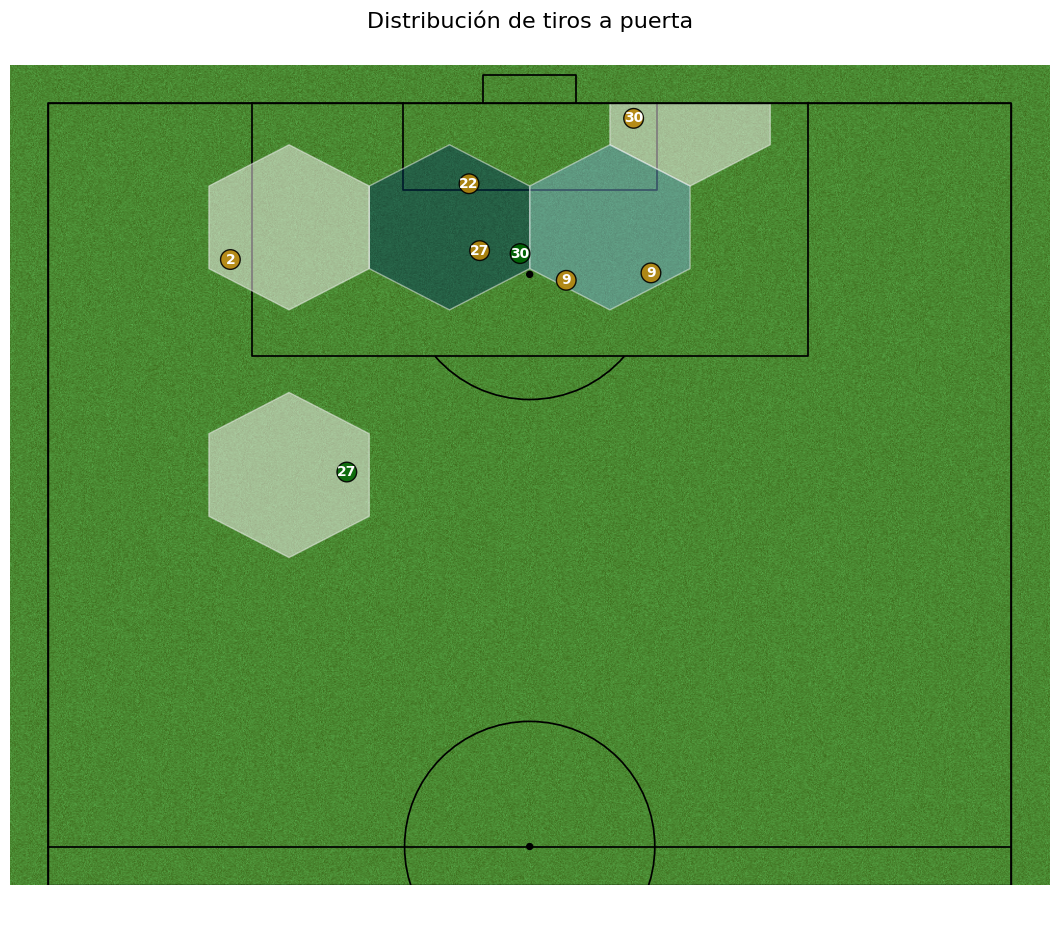

In [26]:
pitch = VerticalPitch(
    pitch_type='opta',
    pitch_color='grass',
    half = True,
    goal_type = 'box',
    linewidth=1.25,
    line_color='black',
    pitch_length=105,
    pitch_width=68
)

fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0,
            title_space=0,
            axis=False,
            grid_height=0.82, endnote_height=0.03)

hexmap = pitch.hexbin(x=100-df_shots_on_target_AL['x'], y=100-df_shots_on_target_AL['y'], ax=axs['pitch'], edgecolors='#f4f4f4',
            gridsize=(6, 6), cmap='PuBu', alpha=.5)
scatter = pitch.scatter(x=100-df_shots_on_target_AL['x'], y=100-df_shots_on_target_AL['y'], ax=axs['pitch'], color=df_shots_on_target_AL['color'], s=200, edgecolors='black', zorder=2,
                        alpha=.9)

# Agregar el número de la camiseta dentro de cada punto
for i, row in df_shots_on_target_AL.iterrows():
    axs['pitch'].annotate(row['jerseyNumber'], 
                          (100-row['y'], 100-row['x']), 
                          color='white', 
                          ha='center', 
                          va='center',
                          fontsize=10, 
                          weight='bold',
                          zorder=3)
fig.suptitle('Distribución de tiros a puerta', fontsize=16)
plt.tight_layout()
plt.show()

# Tiros fuera

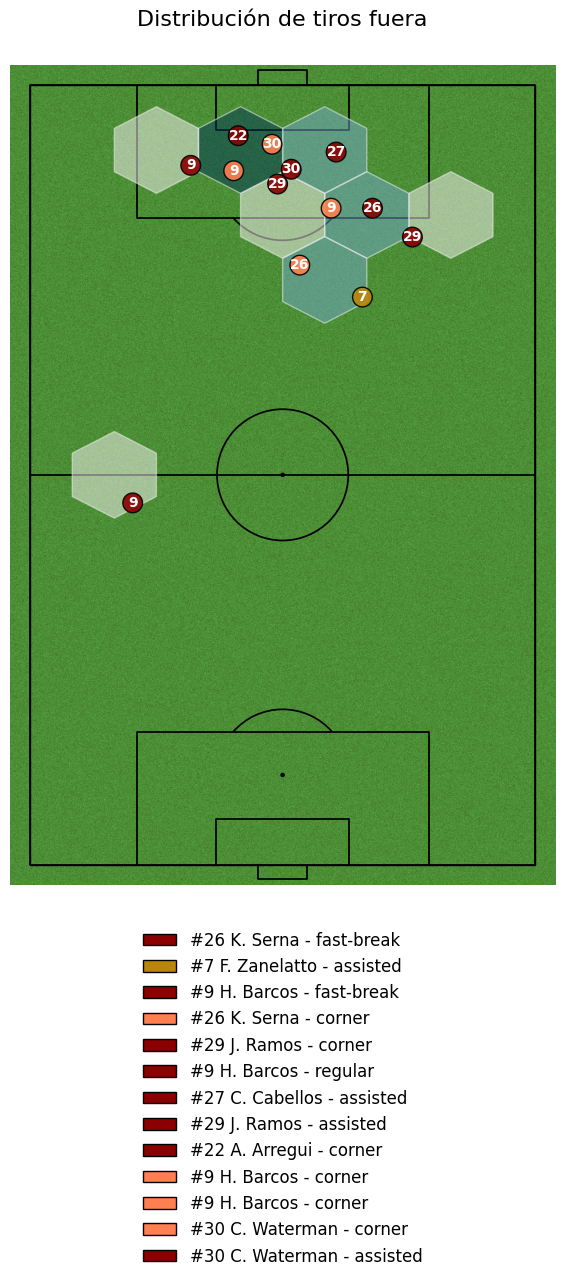

In [44]:
from matplotlib.patches import Patch
pitch = VerticalPitch(
    pitch_type='opta',
    pitch_color='grass',
    half = False,
    goal_type = 'box',
    linewidth=1.25,
    line_color='black',
    pitch_length=105,
    pitch_width=68
)


fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0,
            title_space=0,
            axis=False,
            grid_height=0.82, endnote_height=0.03)
plt.suptitle('Distribución de tiros fuera', fontsize=16)

hexmap = pitch.hexbin(x=100-df_shots_off_target_AL['x'], y=100-df_shots_off_target_AL['y'], ax=axs['pitch'], edgecolors='#f4f4f4',
            gridsize=(6, 6), cmap='PuBu', alpha=.5)

scatter = pitch.scatter(x=100-df_shots_off_target_AL['x'], y=100-df_shots_off_target_AL['y'], ax=axs['pitch'], color=df_shots_off_target_AL['color'], s=200, edgecolors='black', zorder=2,
                        alpha=.9)

# Agregar el número de la camiseta dentro de cada punto
for i, row in df_shots_off_target_AL.iterrows():
    axs['pitch'].annotate(row['jerseyNumber'], 
                          (100-row['y'], 100-row['x']), 
                          color='white', 
                          ha='center', 
                          va='center',
                          fontsize=10, 
                          weight='bold',
                          zorder=3,label=df_shots_off_target_AL['shortName'])
legend_elements = []

for _, row in df_shots_off_target_AL.iterrows():
    color = row['color']
    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=f"#{row['jerseyNumber']} {row['shortName']} - {row['situation']}"))

# Añadir la leyenda dentro del mismo gráfico
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False, fontsize=12)    

plt.tight_layout()
plt.show()